In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings(action="once")
from multiprocessing import  Pool

sns.set_style("darkgrid", {'xtick.top': True, 'ytick.right': True,'xtick.bottom': True, 'ytick.left': True,'grid.linestyle': '--','image.cmap': 'viridis','xtick.direction': 'in', 'ytick.direction': 'in'})

# @working path
FIG_PATH     = '../tex/figs/'
WEB_FIG_PATH = '../tex/web-figs/'
DATA_PATH    = '../code/'


# @global settings

FIG_DPI      = 800
FIG_EXT      = '.pdf'

# @global functions
def savefig(handler,name, fig_ext = FIG_EXT):
    if name != '':
        handler.savefig(FIG_PATH + name + fig_ext, dpi = FIG_DPI,bbox_inches = 'tight', pad_inches = 0.1)
        
def parallelize_dataframe(n_cores, func, df, *args):
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
    df = pd.concat(pool.starmap(func, [(d,*args) for d in df_split]))
    pool.close()
    pool.join()
    return df

def parallelize(n_cores, func, splited_data, *args):
    pool = Pool(n_cores)
    df = pool.starmap(func, [(d,*args) for d in splited_data])
    pool.close()
    pool.join()
    return df

Populating the interactive namespace from numpy and matplotlib


In [4]:
def draw_errors(data, method):
    test_num = len(data)
    fig = plt.figure(figsize=(4, 3))
    ax = fig.add_subplot(1, 1, 1)
    for d, m in zip(data, method):
        ax.plot(d['time'], np.abs(d['$E_{tot}$']),'-.', lw=1,label=m)
        ax.set_yscale('log')
        ax.set_xlabel('time')
        ax.set_ylabel('$\Delta E$')
    ax.legend()
    

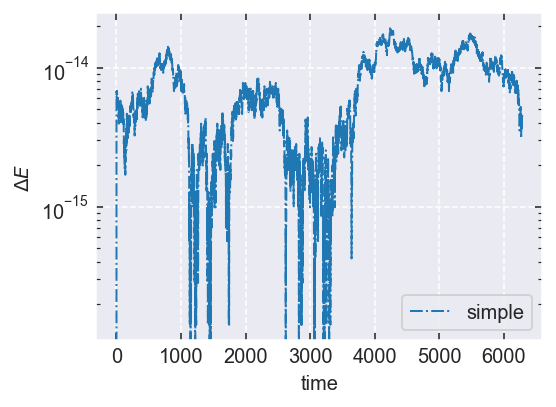

In [62]:
#method = ['simple', 'chain', 'regu', 'archain']
method = ['simple']
fnames = ['cmake-build-debug/circular-BS-' + m + '.err' for m in method]
data = [ pd.read_csv(name, names = ['time','$E_{tot}$']) for name in fnames]
draw_errors(data, method)


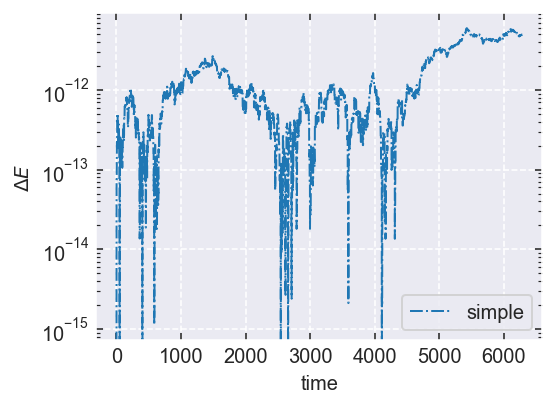

In [47]:
fnames = ['cmake-build-debug/ecc-BS-' + m + '.err' for m in method]
data = [ pd.read_csv(name, names = ['time','$E_{tot}$']) for name in fnames]
draw_errors(data, method)

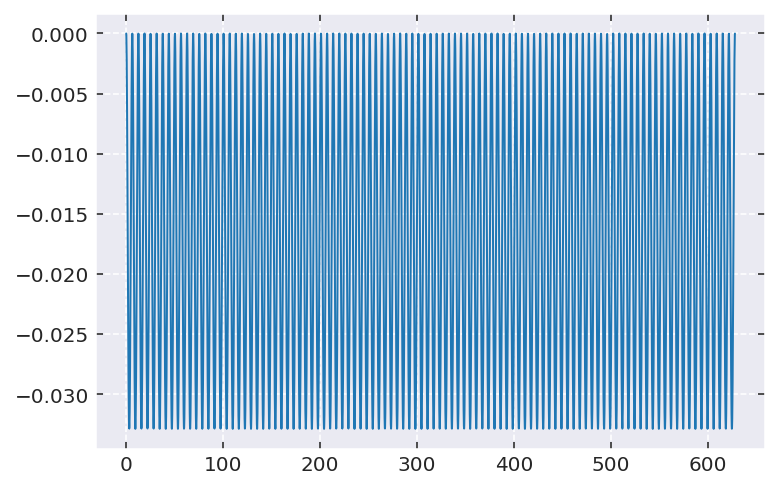

In [146]:
do = (energy['omega'] - energy['omega'][0])/energy['omega'][0]
plt.plot(energy['time'], do,'-', lw=1)


In [2]:
df=pd.read_json('unit_test.json')
df

,tests,failures,disabled,errors,timestamp,time,name,testsuites
0,32,0,0,0,2019-10-17 02:02:15,6.042s,AllTests,"{'name': 'VectorTest', 'tests': 15, 'failures'..."
1,32,0,0,0,2019-10-17 02:02:15,6.042s,AllTests,"{'name': 'MathTest', 'tests': 3, 'failures': 0..."
2,32,0,0,0,2019-10-17 02:02:15,6.042s,AllTests,"{'name': 'Chain', 'tests': 1, 'failures': 0, '..."
3,32,0,0,0,2019-10-17 02:02:15,6.042s,AllTests,"{'name': 'ParticleTest', 'tests': 8, 'failures..."
4,32,0,0,0,2019-10-17 02:02:15,6.042s,AllTests,"{'name': 'CoordsTest', 'tests': 5, 'failures':..."


In [2]:
from decimal import *
getcontext().prec = 18

sub_steps = [0, 5.62625605369221465e-02, 1.80240691736892365e-01, 3.52624717113169637e-01, 5.47153626330555383e-01, 7.34210177215410532e-01, 8.85320946839095768e-01, 9.77520613561287502e-01, 1]
p_step = [Decimal(h) for h in sub_steps]

def gen_c(p_step):
    l=[]
    size = len(p_step)
    for i in range(size):
        x =[]
        for j in range(i):
            x.append(Decimal(1))
            for k in range(len(x)):
                x[k]=x[k]/(p_step[i]-p_step[j])
        l.append(x)
            
    return l
        
l = gen_c(p_step) 

for i in l:
    for x in i:
        print("{:.18E}".format( x),',',end='')
    print('\n')
pos_cof = [Decimal(1.0), Decimal(1)/Decimal(2), Decimal(1)/Decimal(3), Decimal(1)/Decimal(2), Decimal(3)/Decimal(5), Decimal(2)/Decimal(3), Decimal(5)/Decimal(7), Decimal(3)/Decimal(4), Decimal(7)/Decimal(9)]
vel_cof = [Decimal(1.0), Decimal(1)/Decimal(2), Decimal(2)/Decimal(3), Decimal(3)/Decimal(4), Decimal(4)/Decimal(5), Decimal(5)/Decimal(6), Decimal(6)/Decimal(7), Decimal(7)/Decimal(8)]

def tab(h, cof):
    s = 1
    for x in cof:
        print("{:.18E}".format( s*x*h),',',end='')
        s*=x*h

for p in p_step:
    if p != 0:
        print(Decimal(1)/p)


#for p in p_step:
#    tab(p, pos_cof)
#    print('\n')
    




1.777380891407800010E+1 ,

4.475093038455599560E+1 ,8.065938648381887110E+0 ,

5.550952167492269900E+1 ,1.957402937770697400E+1 ,5.801001559264062030E+0 ,

5.216250225615300860E+1 ,2.854090226792989740E+1 ,1.401047393301603230E+1 ,5.140624105810932690E+0 ,

5.080809109074478230E+1 ,3.730381756371244540E+1 ,2.529003421032798570E+1 ,1.400990723922951560E+1 ,5.345976899871109870E+0 ,

7.098538034164872380E+1 ,6.284484413580178570E+1 ,5.210204506663944840E+1 ,3.673612322693264200E+1 ,1.956919433773404300E+1 ,6.617662013702421530E+0 ,

2.308581652314266940E+2 ,2.256686153226573090E+2 ,2.078990291808557330E+2 ,1.657537217326803030E+2 ,1.035788205317551370E+2 ,4.457690493316415290E+1 ,1.084602619023684760E+1 ,

6.434999999999999630E+3 ,6.434999999999999630E+3 ,6.072950422944905660E+3 ,4.978357637829462840E+3 ,3.222865684101661170E+3 ,1.459463037869130990E+3 ,3.879104221958949800E+2 ,4.448519992867183680E+1 ,

17.7738089140780001
5.54813671853721662
2.83587607864443884
1.82764026751759770
1.

In [50]:
1/72

0.013888888888888888